# The Template Method Pattern

### Problem

Let's start from the general daily example.

Imagine the process of making sushi rolls.

This process includes the followin steps:
1. Cook the rice.
2. Add the filling.
3. Wrap the rice with the filling into something.
4. Cook the rolls (optional).
5. Serve.

Different persons can make each particular atep by using different appoaches
 (cook the rice into the Instant Pot or use the Rice Cooker, and we can select a lot of different fillings).

 And, the step 4 is optional
 
 And, what if we don't want to serve...

 However, there are lot of same activities.

So, it is a good idea to define the skeleton of the algorithm and keep this template separately.

And, allow different producers to implement particular steps in defferent manner.

If we take a look at the dictionary definition of a template we can see that a `template` is a preset format, used as a starting point for a particular application so that the format does not have to be recreated each time it is used.

### Solution

**Template method** defines the steps to execute an algorithm and it can provide default implementation that might be common for all or some of the subclasses.

It suggests that you 
* break down an algorithm into a series of steps, 
* turn these steps into methods, 
* and put a series of calls to these methods inside a single `template method`.

It lets subclasses override specific steps of the algorithm without changing its structure

Simply put, the Template Method Pattern helps developers create a group of algorithms that share a common structure

**Key Components:**
* `Abstract Template Class`: Declares methods acting as steps in the algorithm and the template method, orchestrating these steps in a specific order. Steps may be either abstract or have default implementations.
* `Concrete Template Classes`: Can override all steps but not the template method itself. These classes provide specific implementations for the declared steps, customizing the algorithm.

### UML Class Diagram

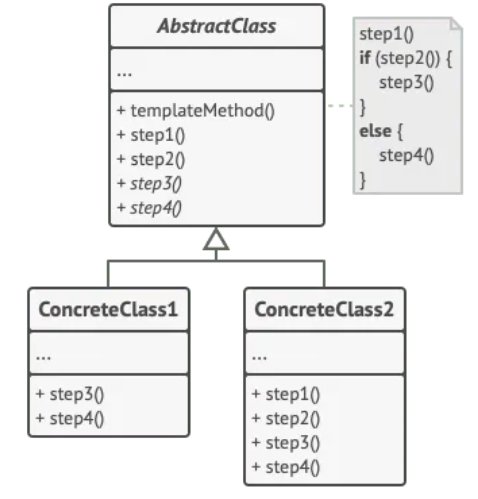

### When to Use

* *Extend Specific Steps*: Use when clients need to extend particular steps of an algorithm without altering its structure.
* *Similar but Not Identical Algorithms*: Apply when dealing with multiple classes having almost identical algorithms with slight variations, making modification tedious.
* *Eliminate Code Duplication*: Implement when turning a monolithic algorithm into a series of steps, allowing easy extension by subclasses, while consolidating similar implementations to eliminate code duplication.

### Example 1 - an abstract implementation 

In [1]:
from abc import ABC, abstractmethod

# Step 1: Abstract Class (Template)
class AbstractTemplate(ABC):
    def template_method(self):
        """The template method orchestrating the steps."""
        self.step_one()
        self.step_two()
        self.step_three()

    @abstractmethod
    def step_one(self):
        """Abstract method representing the first step."""
        pass

    @abstractmethod
    def step_two(self):
        """Abstract method representing the second step."""
        pass

    @abstractmethod
    def step_three(self):
        """Abstract method representing the third step."""
        pass

In [2]:
# Step 2: Concrete Class 1
class ConcreteTemplateA(AbstractTemplate):
    def step_one(self):
        """Concrete implementation for the first step in Template A."""
        print("Performing initialization for Template A.")

    def step_two(self):
        """Concrete implementation for the second step in Template A."""
        print("Executing core logic for Template A.")

    def step_three(self):
        """Concrete implementation for the third step in Template A."""
        print("Finalizing and cleaning up for Template A.")

In [3]:
# Step 3: Concrete Class 2
class ConcreteTemplateB(AbstractTemplate):
    def step_one(self):
        """Concrete implementation for the first step in Template B."""
        print("Setting up resources for Template B.")

    def step_two(self):
        """Concrete implementation for the second step in Template B."""
        print("Performing specialized processing for Template B.")

    def step_three(self):
        """Concrete implementation for the third step in Template B."""
        print("Cleaning up connections and resources for Template B.")

In [4]:
# Creating instances of concrete classes
template_a = ConcreteTemplateA()
# Using the template method to perform steps
print("Executing Template A:")
template_a.template_method()


Executing Template A:
Performing initialization for Template A.
Executing core logic for Template A.
Finalizing and cleaning up for Template A.


In [5]:
template_b = ConcreteTemplateB()
print("\nExecuting Template B:")
template_b.template_method()


Executing Template B:
Setting up resources for Template B.
Performing specialized processing for Template B.
Cleaning up connections and resources for Template B.


### Example 2 - Make Hot Beverage

In [7]:
from abc import ABC, abstractmethod

class IHotBeverage(ABC):
    def boilWater(self):
        print("Let's get some hot water - >boil water")
        
    def pourBevarage(self):
        print("Let's pour into you cap. Enjoy!")
        
    @abstractmethod
    def brew(self):
        pass
    
    @abstractmethod
    def addCondiments(self):
        pass
    
    def makeBeverage(self):
        self.boilWater()
        self.brew()
        self.addCondiments()
        self.pourBevarage()

In [8]:
class Coffee(IHotBeverage):
    def brew(self):
        print("Dripping Coffee Thru the Filters...")
        print("I am dreaming about the Coffee Machine!")
        
    def addCondiments(self):
        print("Let's add some cream..and, sugar..")

In [9]:
class Tea(IHotBeverage):
    def brew(self):
        print("“Steeping the Teabag...")
        print("Why am I not using the Tea Filter bag with good tea..? I should")
        
    def addCondiments(self):
        print("Let's add lemon slice")

In [10]:
hannaCoffee=Coffee()
hannaCoffee.makeBeverage()

Let's get some hot water - >boil water
Dripping Coffee Thru the Filters...
I am dreaming about the Coffee Machine!
Let's add some cream..and, sugar..
Let's pour into you cap. Enjoy!


In [11]:
someoneTea=Tea()
someoneTea.makeBeverage()

Let's get some hot water - >boil water
“Steeping the Teabag...
Why am I not using the Tea Filter bag with good tea..? I should
Let's add lemon slice
Let's pour into you cap. Enjoy!
